# Python Stats and Plotting

# Importing packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from pandas import plotting
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
import urllib


# Reading a csv file

In [2]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")
print(data)

    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1  Female   133  132  124   118.0    64.5     816932
1            2    Male   140  150  124     NaN    72.5    1001121
2            3    Male   139  123  150   143.0    73.3    1038437
3            4    Male   133  129  128   172.0    68.8     965353
4            5  Female   137  132  134   147.0    65.0     951545
5            6  Female    99   90  110   146.0    69.0     928799
6            7  Female   138  136  131   138.0    64.5     991305
7            8  Female    92   90   98   175.0    66.0     854258
8            9    Male    89   93   84   134.0    66.3     904858
9           10    Male   133  114  147   172.0    68.8     955466
10          11  Female   132  129  124   118.0    64.5     833868
11          12    Male   141  150  128   151.0    70.0    1079549
12          13    Male   135  129  124   155.0    69.0     924059
13          14  Female   140  120  147   155.0    70.5     856472
14        

# Creating from arrays

In [3]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [4]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


# Data Manipulation and Descriptions

In [5]:
data.shape # (#of rows, # of columns)

(40, 8)

In [6]:
data.columns # column labels/names and type

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [7]:
print(data['Gender']) # use [] and '' to pick column data

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [8]:
data[data['Gender'] == 'Female']['VIQ'].mean() 
# selected the females in the gender column and then took the mean of 
# the values that matched in the VIQ column

109.45

In [9]:
#quick overview
pd.DataFrame.describe(data)

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


# Grouping Data

In [10]:
# groupby: splitting a dataframe on values of categorical variables
groupby_gender = data.groupby('Gender')

In [11]:
# taking the mean of VIQ for each gender
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [12]:
for gender, value in groupby_gender['Weight']:
    print((gender, value.mean()))

('Female', 137.2)
('Male', 166.44444444444446)


In [13]:
# mean of each column for both genders
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [14]:
# median of each column for each gender
groupby_gender.median()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,18.0,115.5,116.0,115.0,138.5,66.0,855365.0
Male,21.5,118.0,110.5,117.0,172.0,70.5,947241.5


In [15]:
# count of each column (how many data values) for each gender
groupby_gender.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


In [16]:
# sum of each column values for each gender
groupby_gender.sum()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,393,2238,2189,2209,2744.0,1315.3,17253092
Male,427,2300,2305,2232,2996.0,1357.2,19097108


# Exercise 1

In [17]:
# What is the mean value for VIQ for the full population?
data['VIQ'].mean()

112.35

In [18]:
# How many males/females were included in this study?
f = data[data['Gender'] == 'Female']['Gender'].count()
m = data[data['Gender'] == 'Male']['Gender'].count()
print('Females: {}'.format(f))
print('Males: {}'.format(m))

Females: 20
Males: 20


In [19]:
# What is the average value of MRI counts expressed in log units, for males and females?
for gender, value in groupby_gender['MRI_Count']:
    print((gender, value.mean()))

('Female', 862654.6)
('Male', 954855.4)


Female         Axes(0.1,0.15;0.363636x0.75)
Male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

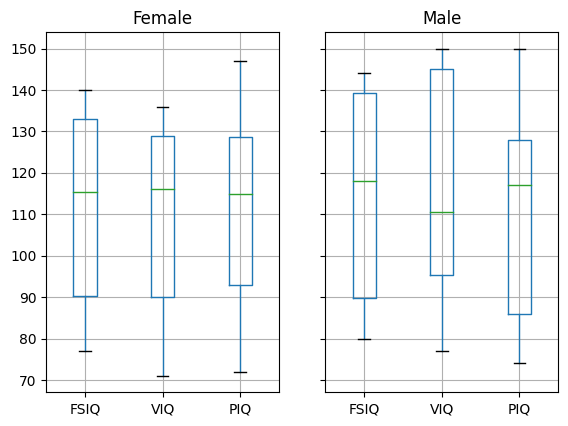

In [20]:
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])

# Plotting Data

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

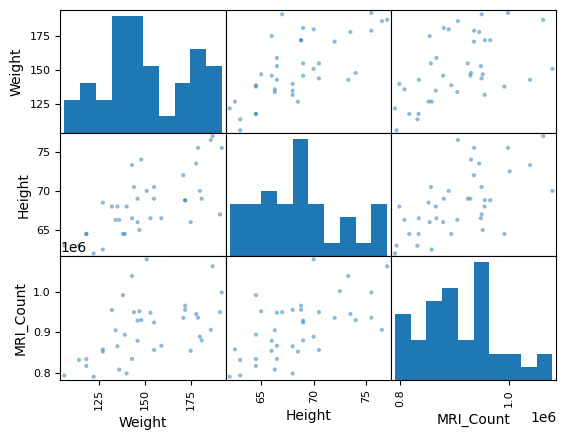

In [21]:
# Scatter plot
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

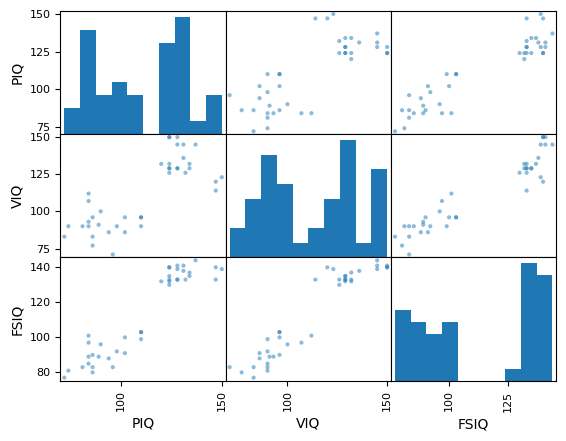

In [22]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])  

# Exercise 2

In [23]:
# Plot the scatter matrix for males only, and for females only. 
# Do you think that the 2 sub-populations correspond to gender?

In [24]:
data1 = data[data['Gender'] == 'Female']
data1

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
10,11,Female,132,129,124,118.0,64.5,833868
13,14,Female,140,120,147,155.0,70.5,856472
14,15,Female,96,100,90,146.0,66.0,878897
15,16,Female,83,71,96,135.0,68.0,865363
16,17,Female,132,132,120,127.0,68.5,852244


In [25]:
data2 = data[data['Gender'] == 'Male']
data2

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466
11,12,Male,141,150,128,151.0,70.0,1079549
12,13,Male,135,129,124,155.0,69.0,924059
17,18,Male,100,96,102,178.0,73.5,945088
19,20,Male,80,77,86,180.0,70.0,889083
20,21,Male,83,83,86,NaN,NaN,892420


array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

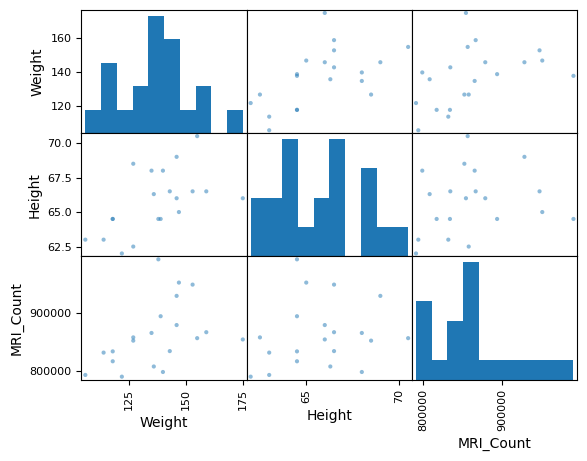

In [26]:
plotting.scatter_matrix(data1[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

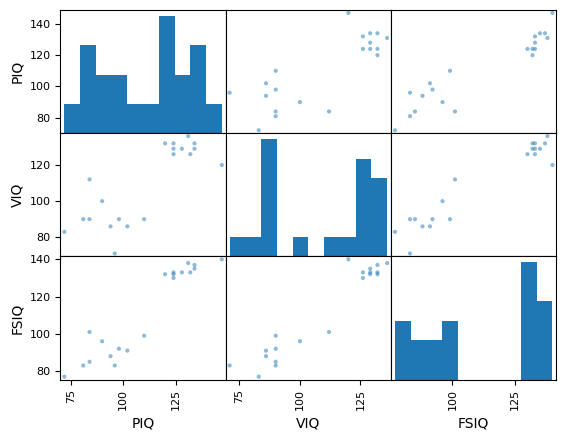

In [27]:
plotting.scatter_matrix(data1[['PIQ', 'VIQ', 'FSIQ']])  

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

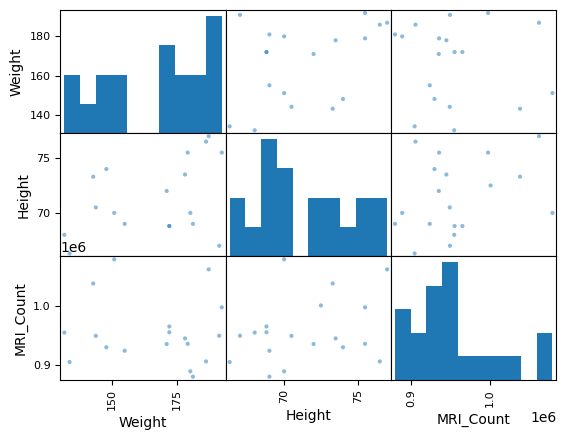

In [28]:
plotting.scatter_matrix(data2[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

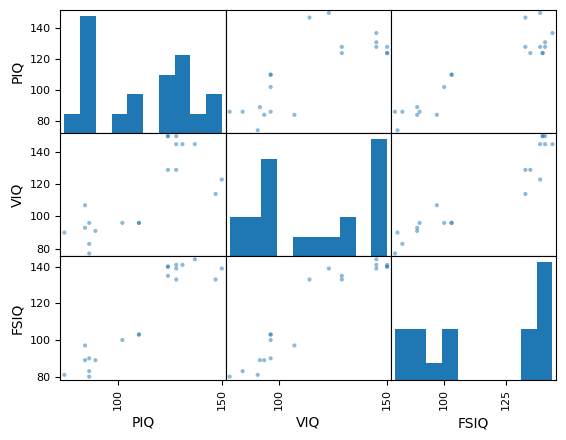

In [29]:
plotting.scatter_matrix(data2[['PIQ', 'VIQ', 'FSIQ']])  

In [30]:
# 2 sub-populations do not seem to correspond to gender

# Statistical Testing

In [31]:
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28, df=39)

In [32]:
female_viq = data[data['Gender'] == 'Female']['VIQ']

In [33]:
male_viq = data[data['Gender'] == 'Male']['VIQ']

In [34]:
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

# Paired Testing

In [35]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

In [36]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

In [37]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

In [38]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

/srv/conda/envs/notebook/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

# Exercise 3

In [39]:
# Test the difference between weights in males and females.

In [40]:
female_weight = data[data['Gender'] == 'Female']['Weight']

In [41]:
male_weight = data[data['Gender'] == 'Male']['Weight']

In [42]:
stats.ttest_ind(female_weight.dropna(), male_weight.dropna())

TtestResult(statistic=-4.870950921940696, pvalue=2.227293018362118e-05, df=36.0)

In [43]:
# Use non parametric statistics to test the difference between VIQ in males and females

In [44]:
stats.mannwhitneyu(female_viq, male_viq)

MannwhitneyuResult(statistic=164.5, pvalue=0.3422886868727315)

# Linear modeling, multiple factors, and variance analysis

In [45]:
# Linear regression
x = np.linspace(-5, 5, 20)
np.random.seed(1)

In [46]:
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

In [47]:
# Create a data frame containing all the relevant variables
data3 = pd.DataFrame({'x': x, 'y': y})

In [48]:
# OLS model
model1 = ols("y ~ x", data3).fit()

In [49]:
print(model1.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        16:02:56   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

# Exercise 4

In [50]:
# Retrieve the estimated parameters from the model above

In [51]:
print(model1.params)

Intercept   -5.533459
x            2.936888
dtype: float64


In [52]:
print(model1.cov_params)

<bound method LikelihoodModelResults.cov_params of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f227638a7c0>>


# Categorical variables: comparing groups or multiple categories

In [53]:
# We can write a comparison between IQ of male and female using a linear model:
model2 = ols("VIQ ~ Gender + 1", data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Fri, 14 Jul 2023   Prob (F-statistic):              0.445
Time:                        16:02:56   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [54]:
# An integer column can be forced to be treated as categorical using
model3 = ols('VIQ ~ C(Gender)', data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Fri, 14 Jul 2023   Prob (F-statistic):              0.445
Time:                        16:02:56   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.30

# Link to t-tests between different FSIQ and PIQ

In [55]:
# To compare different types of IQ, we need to create a “long-form” table, listing IQs, 
# where the type of IQ is indicated by a categorical variable:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [56]:
model4 = ols("iq ~ type", data_long).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Fri, 14 Jul 2023   Prob (F-statistic):              0.643
Time:                        16:02:56   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [57]:
# We can see that we retrieve the same values for t-test and corresponding p-values 
# for the effect of the type of iq than the previous t-test
stats.ttest_ind(data['FSIQ'], data['PIQ']) 

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

# Multiple Regression: including multiple factors

In [58]:
data4 = pd.read_csv('iris.csv')
print(data4)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [59]:
model5 = ols('sepal_width ~ name + petal_length', data4).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           1.58e-20
Time:                        16:02:56   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

# Post-hoc hypothesis testing: analysis of variance (ANOVA)

In [60]:
print(model5.f_test([0, 1, -1, 0]))  

<F test: F=3.2453353465741173, p=0.07369058781701415, df_denom=146, df_num=1>


# Exercise 5

In [61]:
# Going back to the brain size + IQ data, test if the VIQ of male and female are 
# different after removing the effect of brain size, height and weight

In [62]:
model6 = ols('VIQ ~ Gender + Height + Weight + MRI_Count', data).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.733
Date:                Fri, 14 Jul 2023   Prob (F-statistic):             0.0455
Time:                        16:02:56   Log-Likelihood:                -167.03
No. Observations:                  38   AIC:                             344.1
Df Residuals:                      33   BIC:                             352.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        169.7719     90.054      1.

In [63]:
print(model6.f_test([0, 1, 0, 0, 0])) 

<F test: F=0.8698460744965407, p=0.35777194392092526, df_denom=33, df_num=1>


# Seaborn for statistical exploration

In [64]:
if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data5 = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, engine='python',
                       header=None)
data5.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
data5['WAGE'] = np.log10(data5['WAGE'])

In [65]:
print(data5)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION      WAGE  AGE  RACE  \
0            8      0    1          21      0  0.707570   35     2   
1            9      0    1          42      0  0.694605   57     3   
2           12      0    0           1      0  0.824126   19     3   
3           12      0    0           4      0  0.602060   22     3   
4           12      0    0          17      0  0.875061   35     3   
..         ...    ...  ...         ...    ...       ...  ...   ...   
529         18      0    0           5      0  1.055378   29     3   
530         12      0    1          33      0  0.785330   51     1   
531         17      0    1          25      1  1.366423   48     1   
532         12      1    0          13      1  1.298416   31     3   
533         16      0    0          33      0  1.186956   55     3   

     OCCUPATION  SECTOR  MARR  
0             6       1     1  
1             6       1     1  
2             6       1     0  
3             6       0     0  

In [66]:
# Pairplot: scatter matrices

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


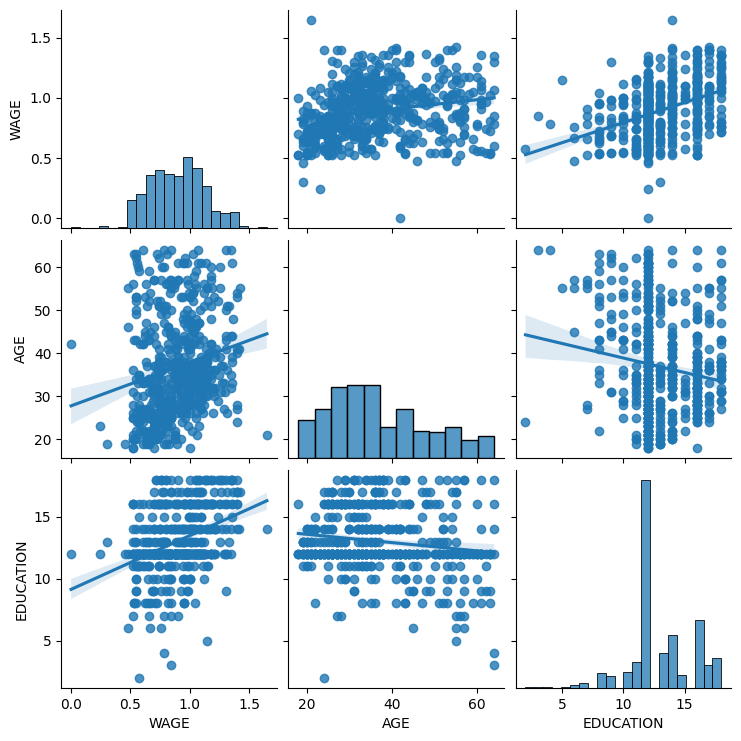

In [67]:
sns.pairplot(data5, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg')

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


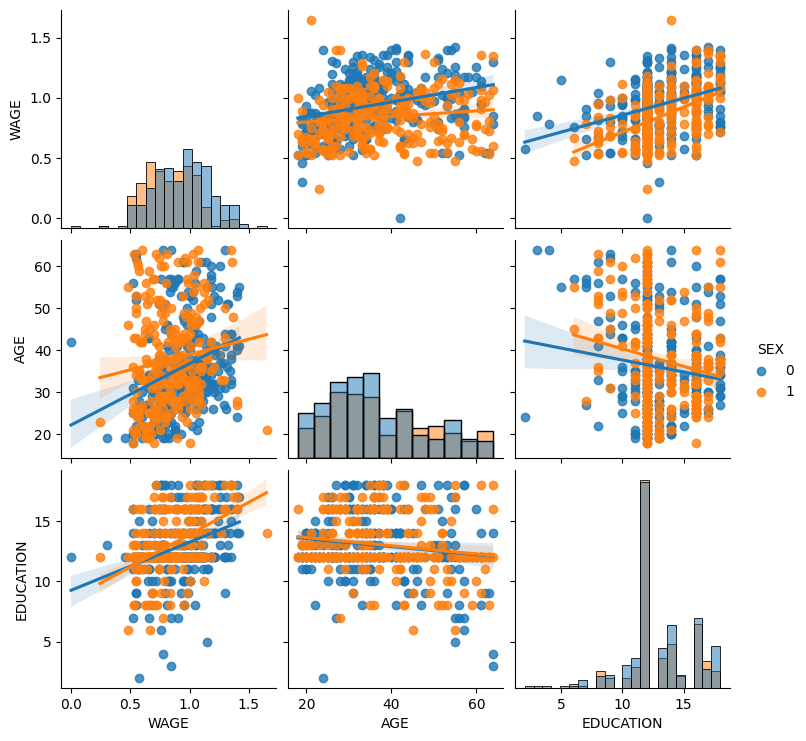

In [68]:
sns.pairplot(data5, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX', diag_kind='hist')

# lmplot: plotting a univariate regression

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


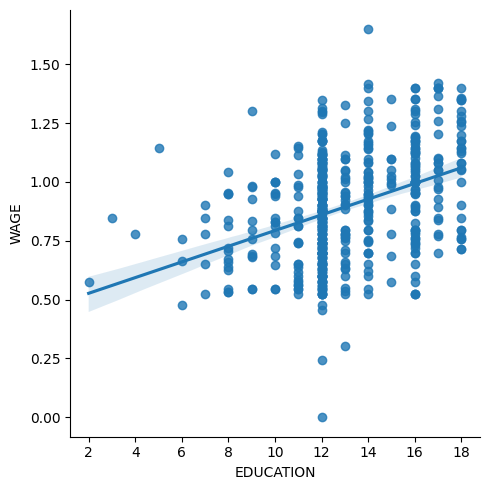

In [69]:
sns.lmplot(y='WAGE', x='EDUCATION', data=data5) 

# Testing for interactions

In [70]:
result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                data=data5).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           2.94e-25
Time:                        16:03:11   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


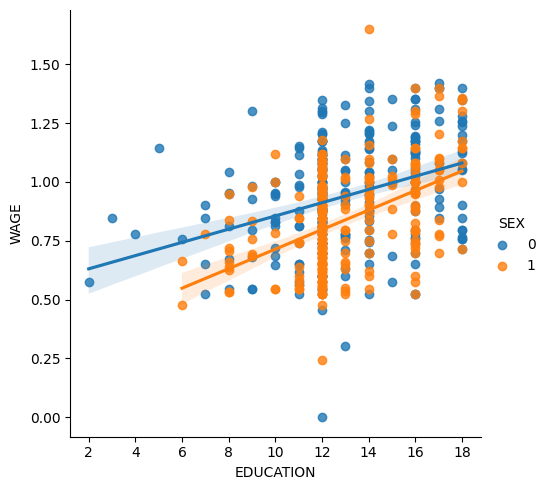

In [71]:
sns.lmplot(y='WAGE', x='EDUCATION', hue='SEX', data=data5)